<a href="https://colab.research.google.com/github/dyumnaa/traffic/blob/main/Indian_Traffic_Signs-yolov8Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:

from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets2
%cd {HOME}/datasets2
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ujPTYIITjVMTrXyZSYDY")
project = rf.workspace("major-project-vu7ji").project("indian-traffic-signboards-zcmku")
version = project.version(5)
dataset = version.download("yolov8")


/content/datasets2
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Indian-Traffic-Signboards--5 in yolov8:: 100%|██████████| 6566/6566 [00:01<00:00, 6147.75it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=5 imgsz=800 plots=True


/content
100% 21.5M/21.5M [00:00<00:00, 442MB/s]
New https://pypi.org/project/ultralytics/8.2.38 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets2/Indian-Traffic-Signboards--5/data.yaml, epochs=5, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stri

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1718951027.89e6ab022d8a.2114.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


/content


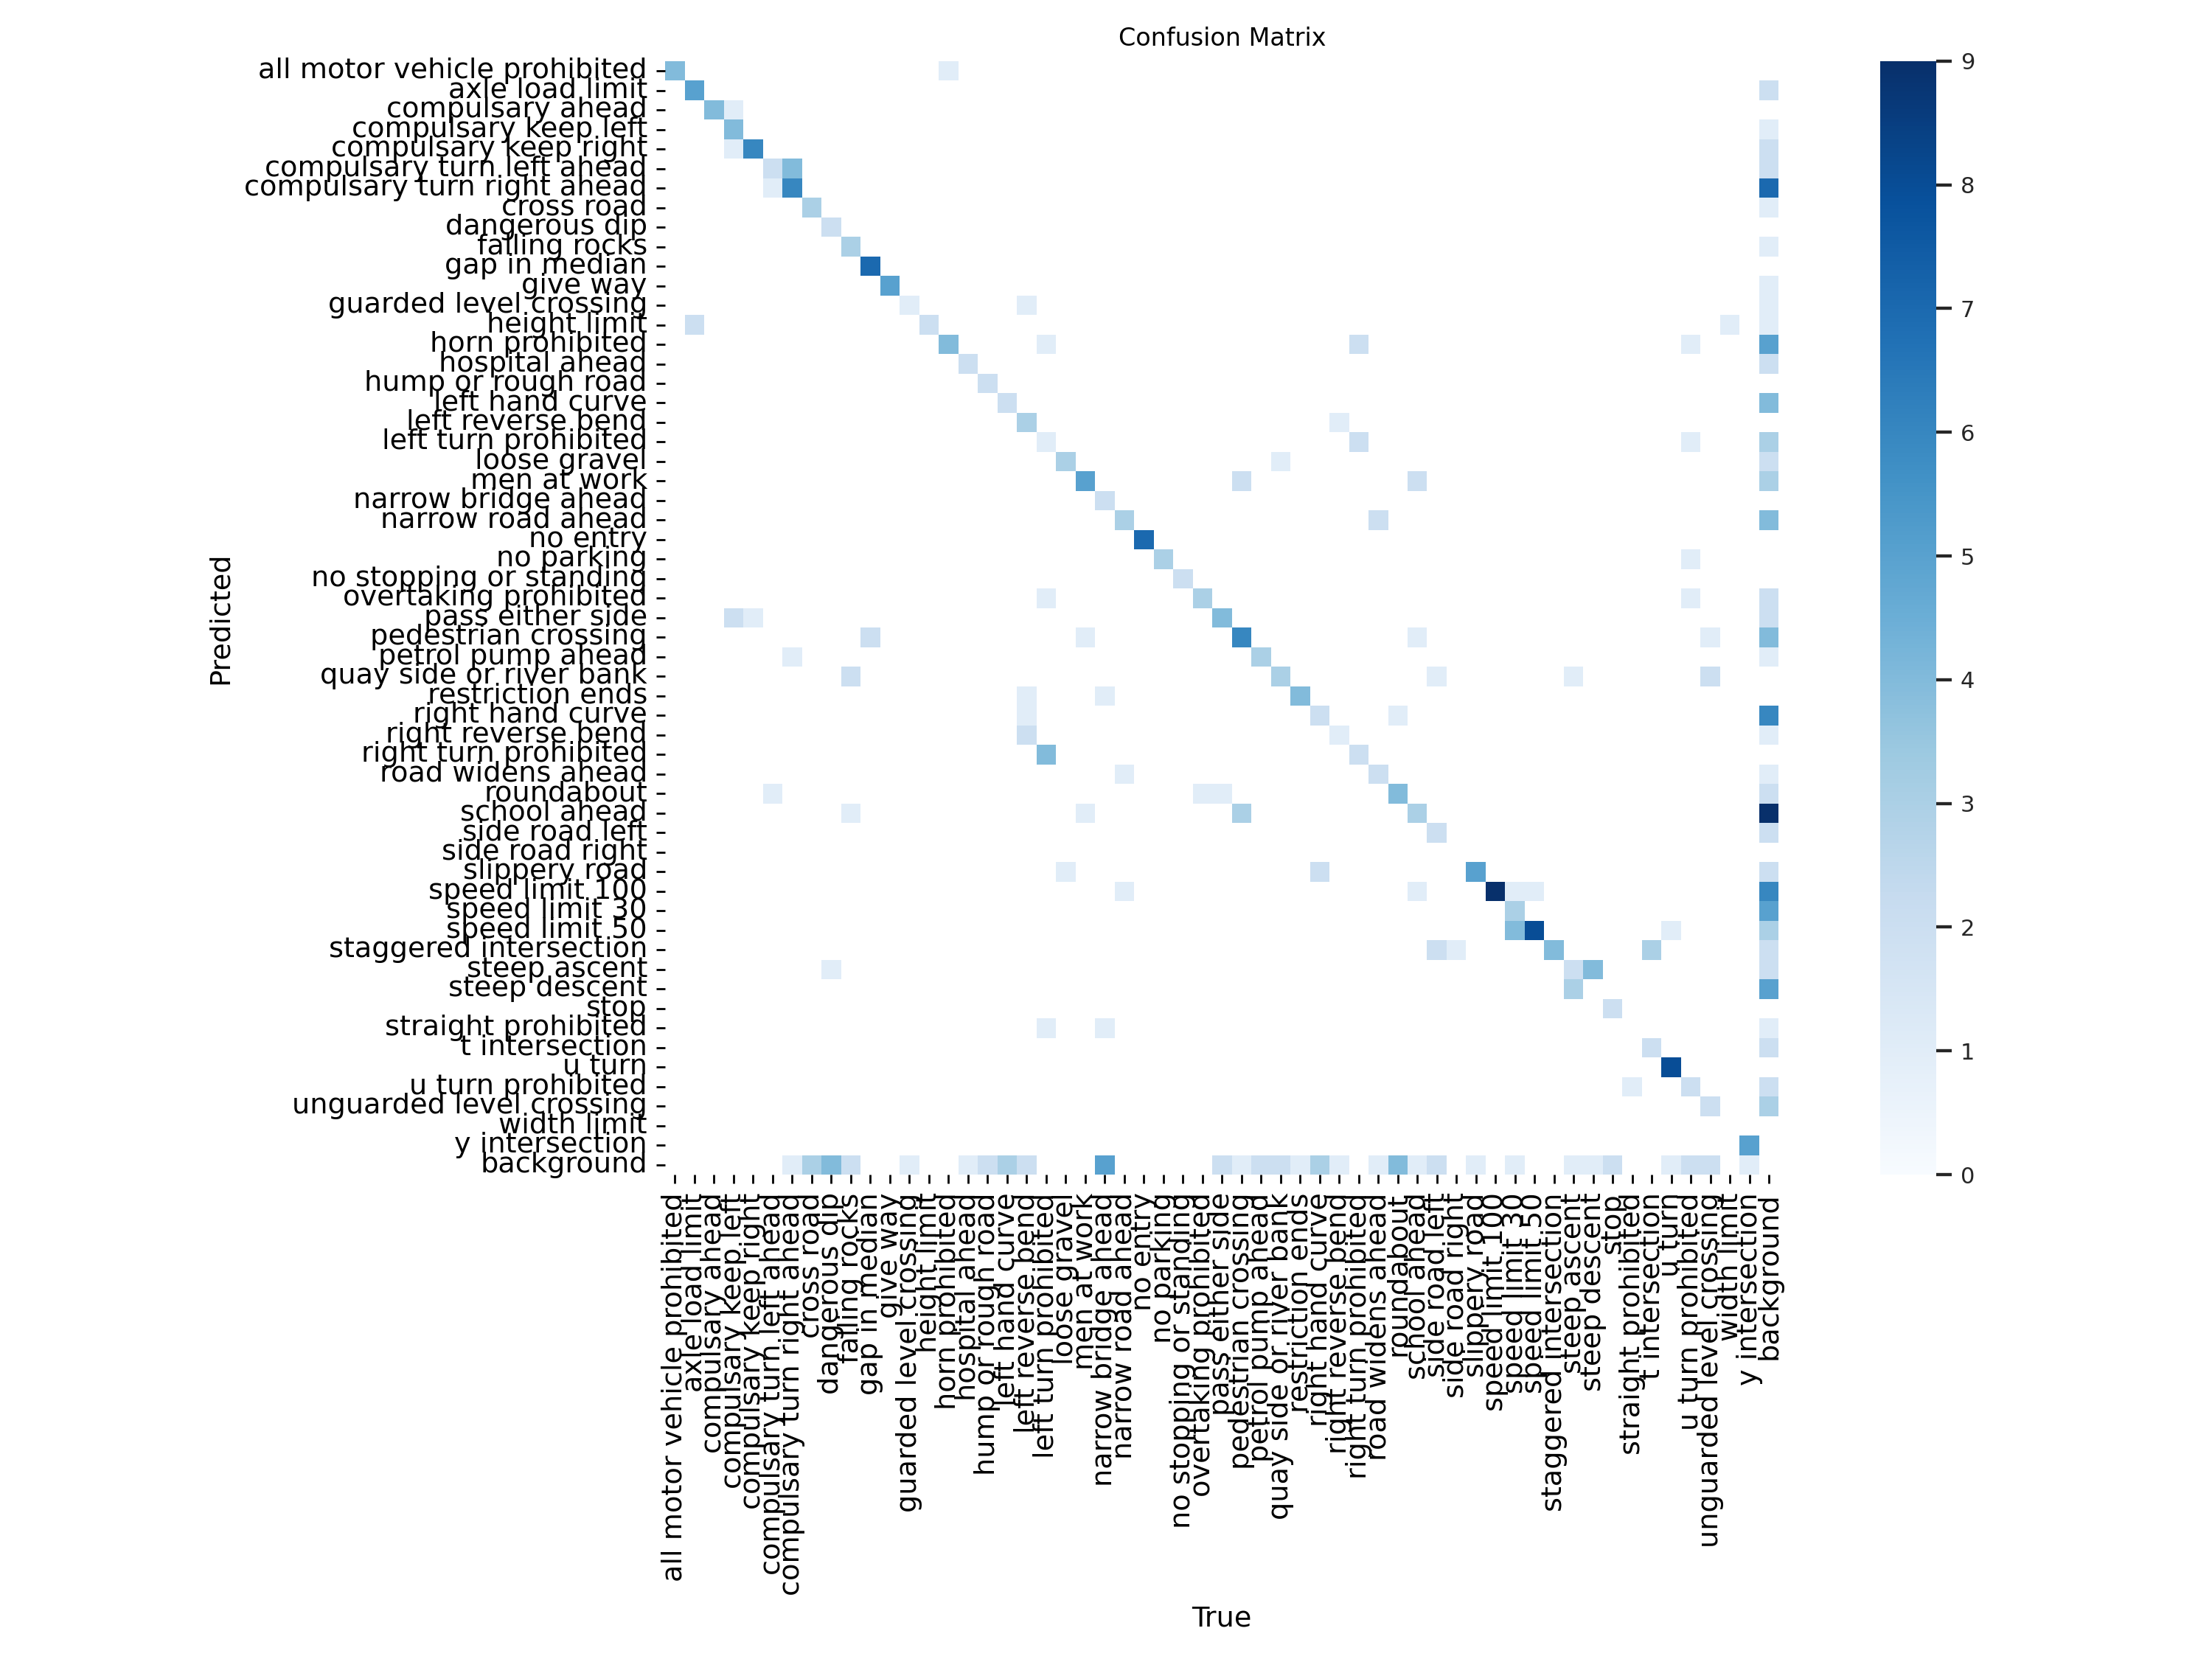

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


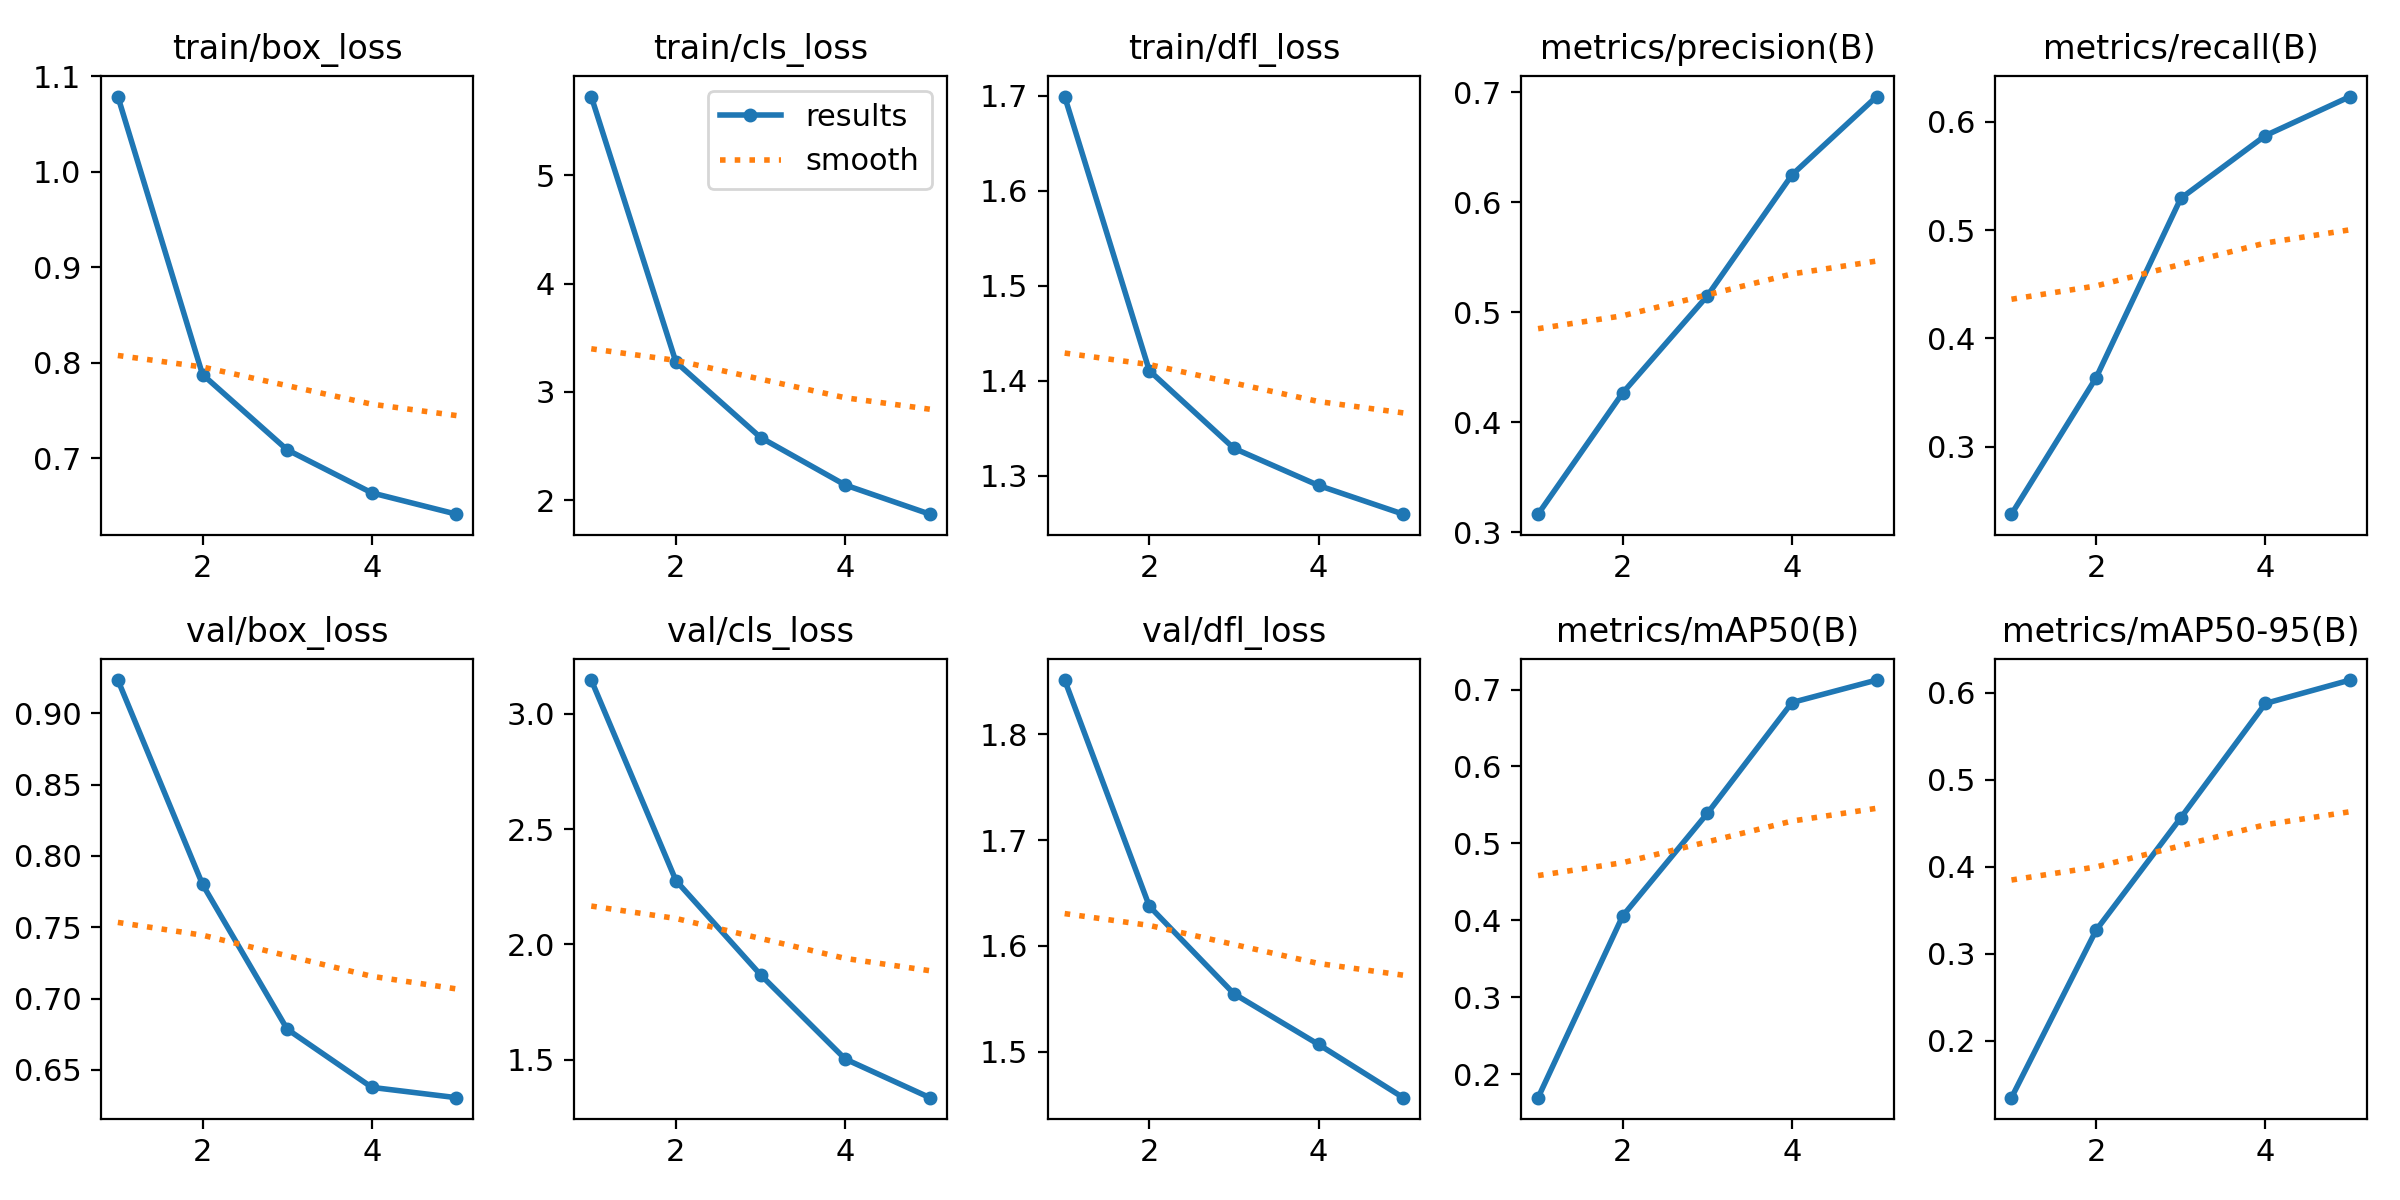

In [ ]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


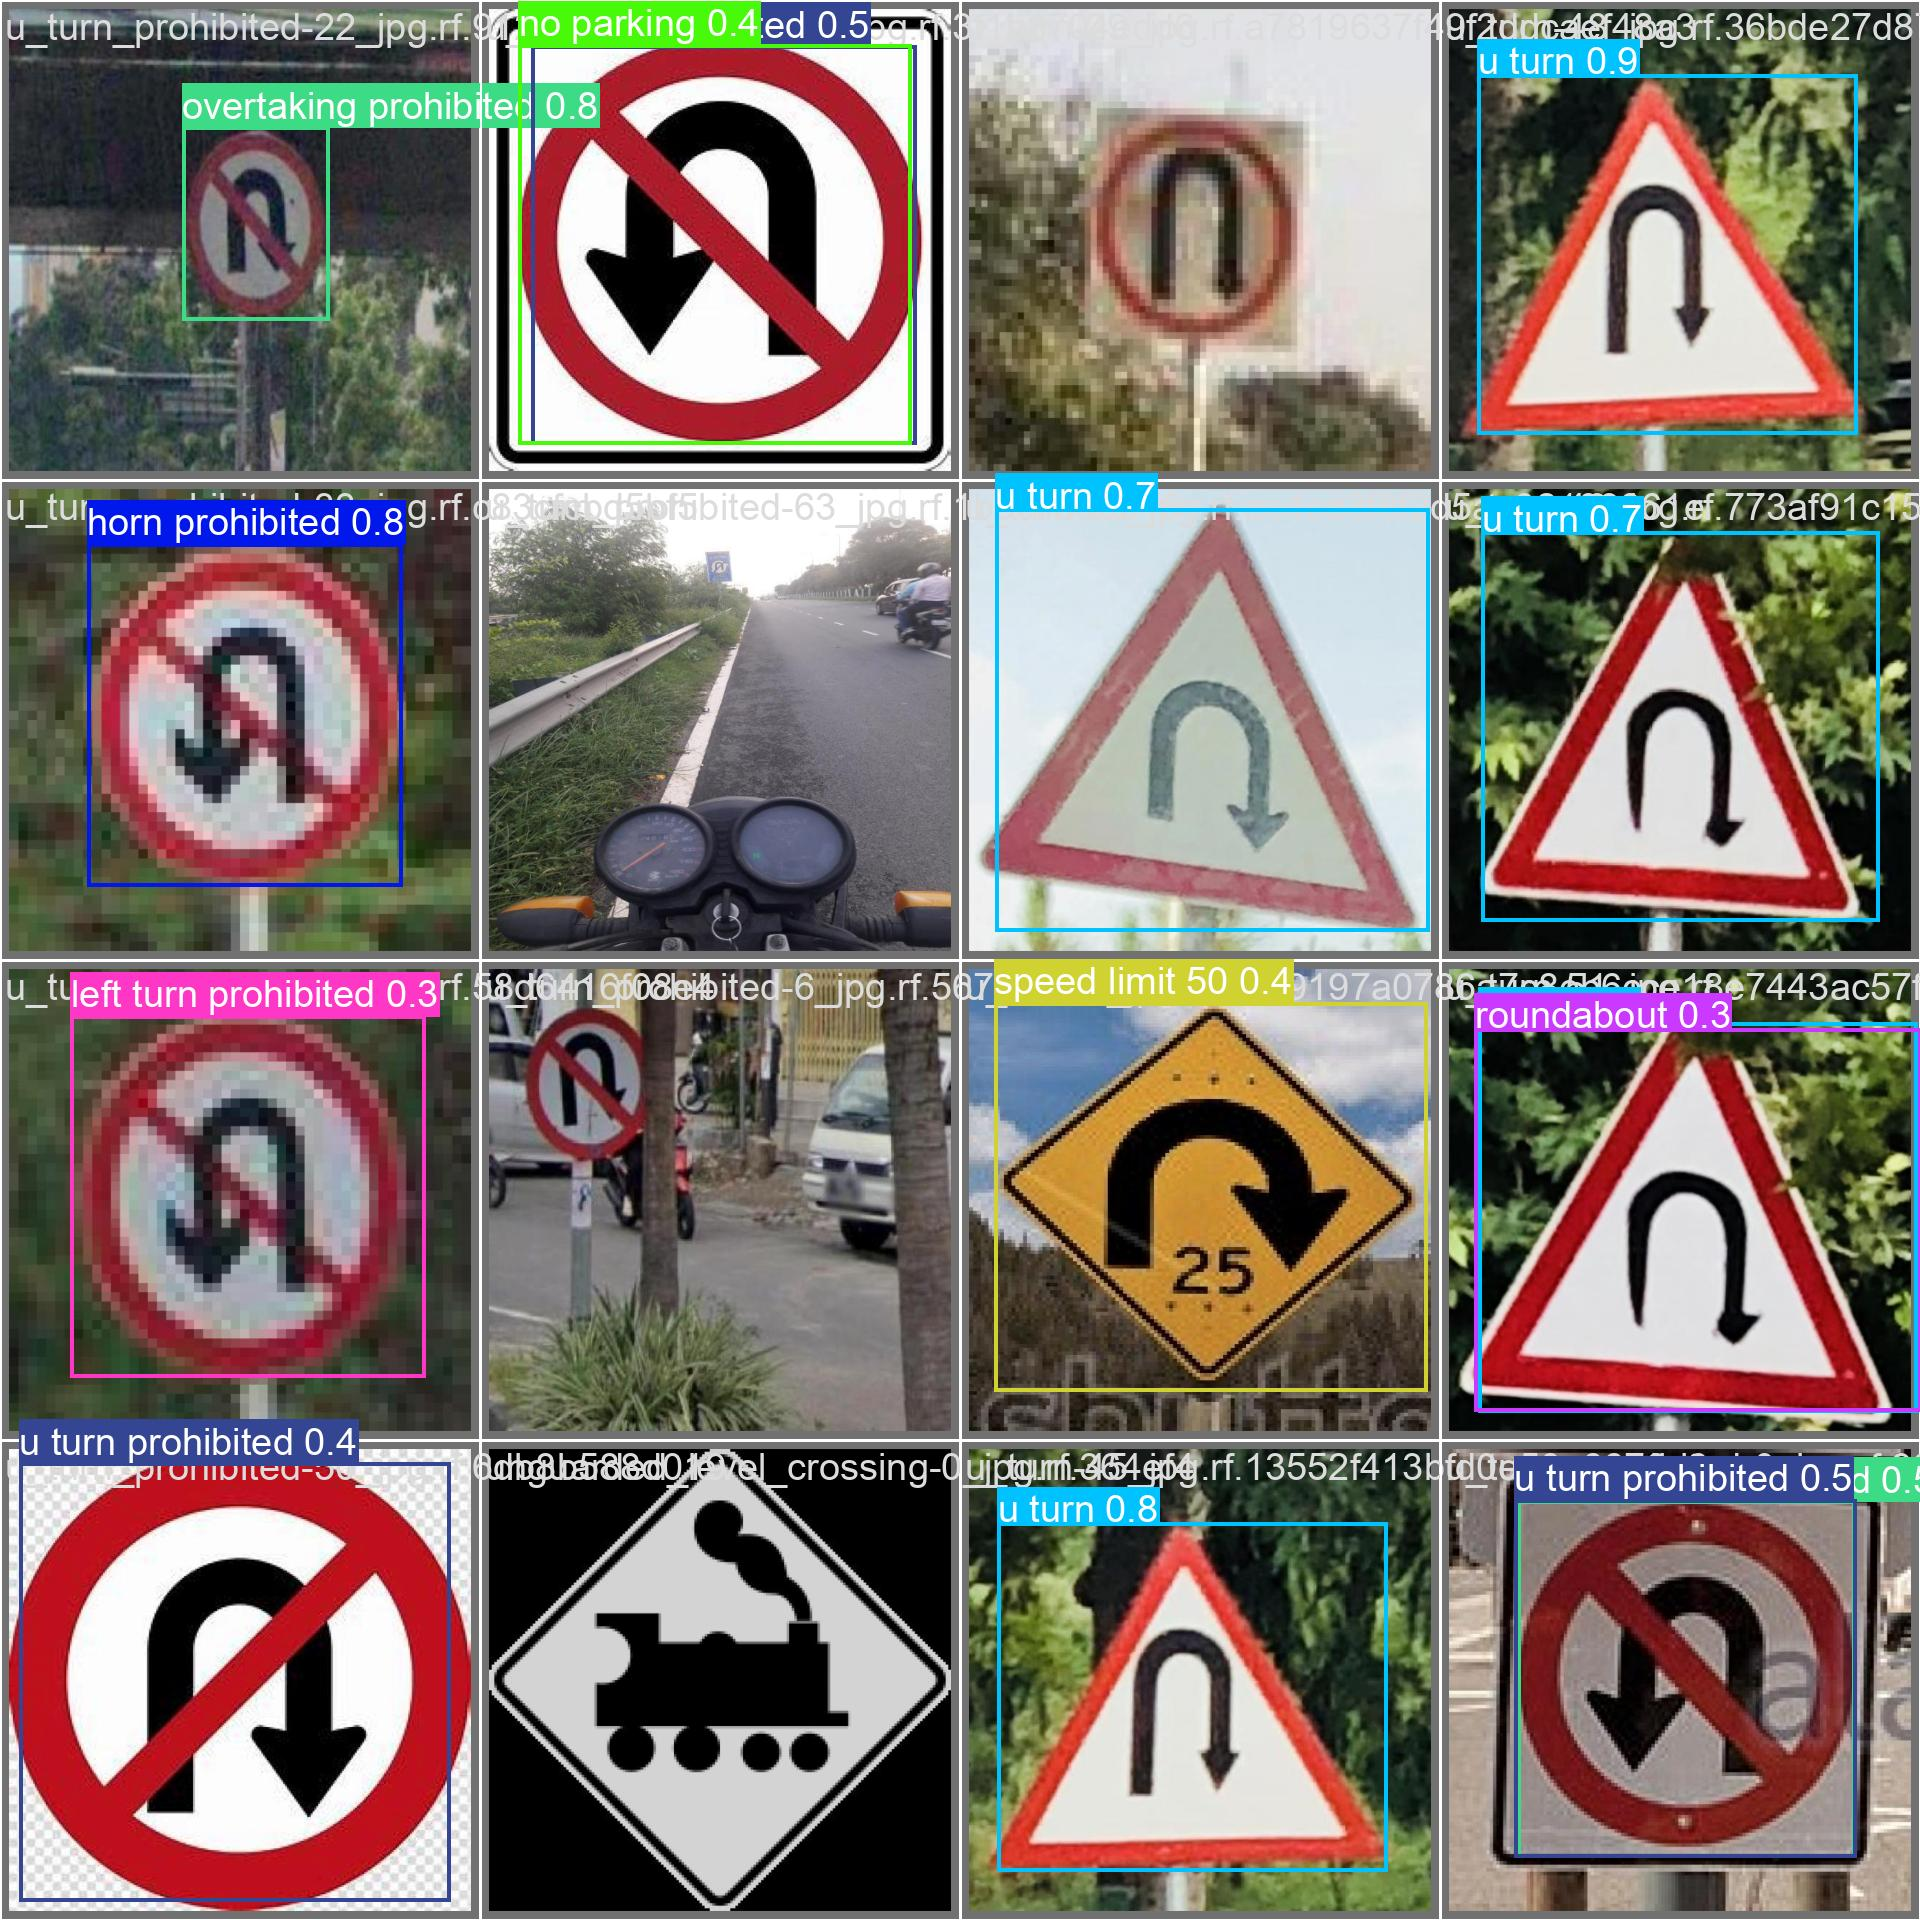

In [ ]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11147256 parameters, 0 gradients, 28.6 GFLOPs
val: Scanning /content/datasets2/Indian-Traffic-Signboards--5/valid/labels.cache... 333 images, 0 backgrounds, 0 corrupt: 100% 333/333 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 21/21 [00:10<00:00,  1.99it/s]
                   all        333        333      0.694      0.625      0.712      0.615
all motor vehicle prohibited        333          4      0.835          1      0.995      0.765
       axle load limit        333          7      0.982          1      0.995      0.887
      compulsary ahead        333          4      0.857          1      0.995      0.904
  compulsary keep left        333          8       0.92        0.5      0.803      0.669
 compulsary keep right        333          7      0.753          1      0.978      0.917
comp

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11147256 parameters, 0 gradients, 28.6 GFLOPs

image 1/666 /content/datasets2/Indian-Traffic-Signboards--5/test/images/all_motor_vehicle_prohibited-13_jpg.rf.949b76975459991e32bcaa76e79af9b8.jpg: 800x800 1 all motor vehicle prohibited, 22.7ms
image 2/666 /content/datasets2/Indian-Traffic-Signboards--5/test/images/all_motor_vehicle_prohibited-17_jpg.rf.a00228f04fa85b15666be0f66fa2db3d.jpg: 800x800 1 all motor vehicle prohibited, 22.7ms
image 3/666 /content/datasets2/Indian-Traffic-Signboards--5/test/images/all_motor_vehicle_prohibited-18_jpg.rf.23f8a6a35b049b9ff41840d506d2da1a.jpg: 800x800 1 all motor vehicle prohibited, 22.6ms
image 4/666 /content/datasets2/Indian-Traffic-Signboards--5/test/images/all_motor_vehicle_prohibited-22_jpg.rf.61e14087fa333d3a29cf3fb9ff42522f.jpg: 800x800 1 all motor vehicle prohibited, 22.7ms
image 5/666 /content/datasets2/Indian

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")